In [1]:
import pandas as pd

# Load datasets
sentiment = pd.read_csv("fear_greed_index.csv")
trader = pd.read_csv("historical_data.csv")

# Show first few rows
print("Sentiment Data Preview:")
display(sentiment.head())

print("Trader Data Preview:")
display(trader.head())


Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
print("=== SENTIMENT DATA INFO ===")
print("Shape:", sentiment.shape)

print("\nMissing values:")
print(sentiment.isnull().sum())

print("\nDuplicate rows:", sentiment.duplicated().sum())


print("\n\n=== TRADER DATA INFO ===")
print("Shape:", trader.shape)

print("\nMissing values:")
print(trader.isnull().sum())

print("\nDuplicate rows:", trader.duplicated().sum())


=== SENTIMENT DATA INFO ===
Shape: (2644, 4)

Missing values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate rows: 0


=== TRADER DATA INFO ===
Shape: (211224, 16)

Missing values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate rows: 0


In [4]:
# Convert sentiment date column
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Convert trader timestamp (AUTO detect format)
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], dayfirst=True, errors='coerce')

# Extract only date
trader['date'] = trader['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

print("Date conversion done!")


Date conversion done!


In [5]:
# Merge datasets on date
merged = pd.merge(trader, sentiment, on='date', how='inner')

print("Merged dataset shape:", merged.shape)
merged.head()


Merged dataset shape: (211218, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [6]:
# Daily total PnL
daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()

print("Daily PnL created!")
daily_pnl.head()


Daily PnL created!


,date,Closed PnL
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,-205.434737
3,2023-12-15,-24.632034
4,2023-12-16,0.000000


In [7]:
# Create win/loss column
merged['is_win'] = merged['Closed PnL'] > 0

# Daily trade count
daily_trades = merged.groupby('date').size().reset_index(name='trade_count')

# Daily win rate
daily_winrate = merged.groupby('date')['is_win'].mean().reset_index(name='win_rate')

print("Trade metrics created!")
daily_trades.head(), daily_winrate.head()


Trade metrics created!


(         date  trade_count
 0  2023-05-01            3
 1  2023-12-05            9
 2  2023-12-14           11
 3  2023-12-15            2
 4  2023-12-16            3,
          date  win_rate
 0  2023-05-01  0.000000
 1  2023-12-05  0.000000
 2  2023-12-14  0.363636
 3  2023-12-15  0.000000
 4  2023-12-16  0.000000)

In [8]:
# Merge all daily metrics
daily_metrics = daily_pnl.merge(daily_trades, on='date')
daily_metrics = daily_metrics.merge(daily_winrate, on='date')

# Add sentiment info
sentiment_daily = sentiment[['date', 'classification']]
daily_metrics = daily_metrics.merge(sentiment_daily, on='date')

print("Final daily metrics ready!")
daily_metrics.head()


Final daily metrics ready!


,date,Closed PnL,trade_count,win_rate,classification
0,2023-05-01,0.000000,3,0.000000,Greed
1,2023-12-05,0.000000,9,0.000000,Extreme Greed
2,2023-12-14,-205.434737,11,0.363636,Greed
3,2023-12-15,-24.632034,2,0.000000,Greed
4,2023-12-16,0.000000,3,0.000000,Greed


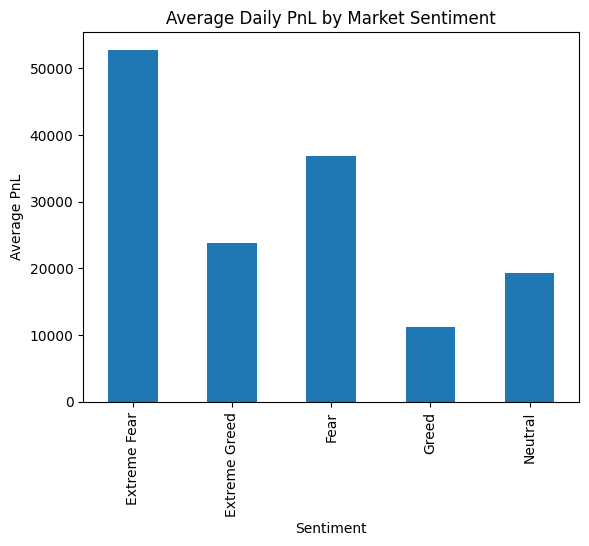

In [9]:
import matplotlib.pyplot as plt

# Average PnL by sentiment
pnl_sentiment = daily_metrics.groupby('classification')['Closed PnL'].mean()

# Plot
pnl_sentiment.plot(kind='bar')

plt.title("Average Daily PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Sentiment")
plt.show()


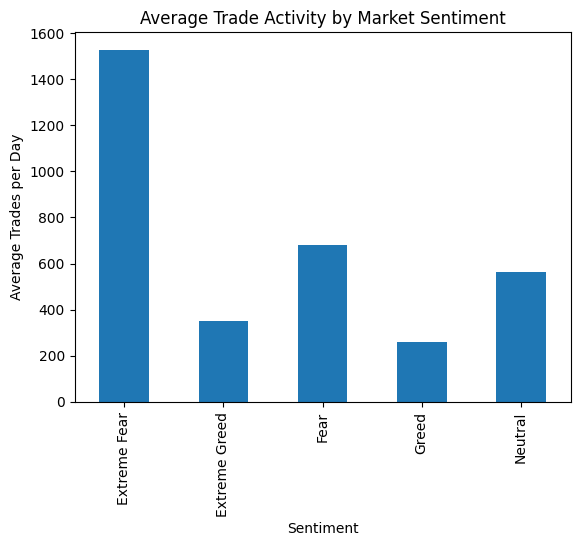

In [10]:
# Average trade count by sentiment
trade_activity = daily_metrics.groupby('classification')['trade_count'].mean()

# Plot
trade_activity.plot(kind='bar')

plt.title("Average Trade Activity by Market Sentiment")
plt.ylabel("Average Trades per Day")
plt.xlabel("Sentiment")
plt.show()


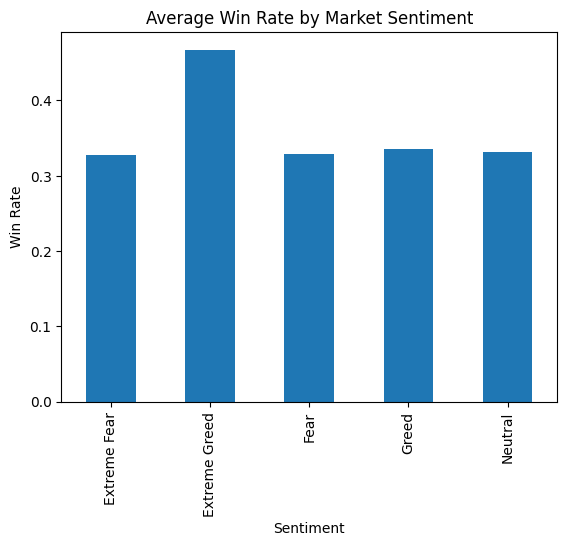

In [11]:
# Average win rate by sentiment
winrate_sentiment = daily_metrics.groupby('classification')['win_rate'].mean()

# Plot
winrate_sentiment.plot(kind='bar')

plt.title("Average Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.show()


In [13]:
print("Strategy Recommendations:")

print("\n1. During Extreme Fear periods:")
print("Traders show high activity and strong profitability. A strategy could focus on increasing trade frequency while maintaining moderate leverage.")

print("\n2. During Extreme Greed periods:")
print("Although win rates are highest, overconfidence risks exist. A strategy could involve reducing position sizes and focusing on risk management.")


Strategy Recommendations:

1. During Extreme Fear periods:
Traders show high activity and strong profitability. A strategy could focus on increasing trade frequency while maintaining moderate leverage.

2. During Extreme Greed periods:
Although win rates are highest, overconfidence risks exist. A strategy could involve reducing position sizes and focusing on risk management.
